In [1]:
%matplotlib inline

In [2]:
import bokeh.plotting
from bokeh.plotting import figure, output_file, show, output_notebook

import numpy
import numpy as np

import scipy
import scipy as sp
from scipy.spatial import ConvexHull

import skimage.measure
from skimage.measure import find_contours

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot
import matplotlib.pyplot as plt

output_notebook()

Loading BokehJS ...

In [3]:
# Create the mask we want to use.
a = np.zeros((5, 6), dtype=bool)
a[1:, 2:] = 1
a[-1, -1] = 0
a[-3, -4] = 0

print(a)

[[False False False False False False]
 [False False  True  True  True  True]
 [False False False  True  True  True]
 [False False  True  True  True  True]
 [False False  True  True  True False]]


In [4]:
# RGBA of the mask and backgroun (same as matplotlib).
rgba_mask = np.array([127, 0, 0, 255], dtype=np.uint8)
rgba_bckgrd = np.array([0, 0, 127, 255], dtype=np.uint8)

# Create an RGB layer from the mask.
ac = np.repeat(a, 4, -1).reshape(a.shape + (4,)).astype(np.uint8)
ac *= rgba_mask
ac += (a==0)[..., None]*rgba_bckgrd
ac = ac.view(np.uint32)[..., 0]

print(ac)
print("")
print(ac != 0)

[[4286513152 4286513152 4286513152 4286513152 4286513152 4286513152]
 [4286513152 4286513152 4278190207 4278190207 4278190207 4278190207]
 [4286513152 4286513152 4286513152 4278190207 4278190207 4278190207]
 [4286513152 4286513152 4278190207 4278190207 4278190207 4278190207]
 [4286513152 4286513152 4278190207 4278190207 4278190207 4286513152]]

[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


In [5]:
# Size for each block from the mask in the plot.
block_size = 60

# Construct figure with image of the mask.
p = figure(
    plot_width=a.shape[1]*block_size, plot_height=a.shape[0]*block_size,
    x_range=[0, a.shape[1]], y_range=[a.shape[0], 0],
    x_axis_location="above",
    title=""
)
p.image_rgba([np.flipud(ac)], x=0, y=a.shape[0], dw=a.shape[1], dh=a.shape[0])

show(p)

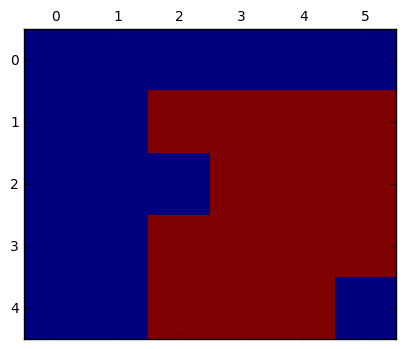

In [6]:
plt.matshow(a)
plt.show()